# Face detection using Cognitive Services

To illustrate how cognitive services can be used for detecting faces in an image and identifying various attributes such as the number of people, their gender and age, consider the following sample image from http://www.how-old.net:
<img src="https://how-old.net/Images/faces2/main007.jpg" width=500 height=500>

Here is the URL of the image above. You can experiment with different images simply by changing ``image_url`` to point to a different image and re-running this notebook.

In [1]:
image_url = 'https://how-old.net/Images/faces2/main007.jpg'

As in our previous tutorial, we initialize the parameters to the web service such as the API keys and the attributes in faces that need to be detected.

In [2]:
# Replace the subscription_key string value with your valid subscription key.
subscription_key = 'e4424a07aafe441db28946e4b0e77eda'

api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key
}
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

We can now make the call to the Face detection APIs using the `requests` package and examine the JSON reponse

In [3]:
import requests
from IPython.display import HTML
response = requests.post(api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

Finally, we use the Matplotlib library in Python to plot the image and annotate it with face information found using the Face APIs.

(-0.5, 499.5, 499.5, -0.5)

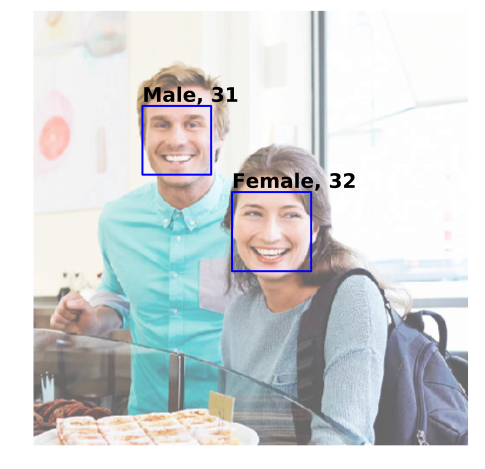

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
plt.axis("off")

For more information on the Microsoft Cognitive Face APIs, see [here](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236) for the full documentation of the REST APIs.

Here are more images that can be analyzed using the same technique.
First, we define a helper function, ``annotate_image`` to annotate an image given its URL.
We can then call ``annotate_image`` on other images as desired.

In [5]:
def annotate_image(image_url):
    response = requests.post(api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

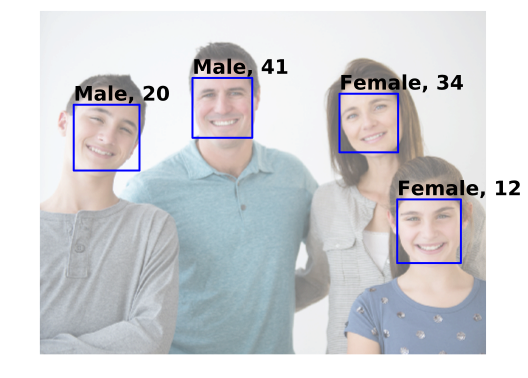

In [6]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main002.jpg")

In [ ]:
annotate_image("https://how-old.net/Images/faces2/main004.jpg")